In [3]:
import pandas as pd

In [4]:
df1 = pd.read_csv("Bengaluru_House_Data.csv")

In [5]:
df1.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [6]:
df1.shape

(13320, 9)

In [7]:
grouped = df1.groupby("area_type")["area_type"].count()
print(grouped)

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64


In [8]:
df2 = df1.drop(["area_type", "availability", "society", "balcony"], axis = "columns")
df2.shape

(13320, 5)

In [9]:
df2

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00
...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453,4.0,231.00
13316,Richards Town,4 BHK,3600,5.0,400.00
13317,Raja Rajeshwari Nagar,2 BHK,1141,2.0,60.00
13318,Padmanabhanagar,4 BHK,4689,4.0,488.00


In [10]:
df2.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [11]:
filt = (df2["bath"].isnull() == True)
na_bath = df2["bath"][filt].index

In [12]:
df3 = df2.drop(na_bath, axis = "index")

In [13]:
df3

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00
...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453,4.0,231.00
13316,Richards Town,4 BHK,3600,5.0,400.00
13317,Raja Rajeshwari Nagar,2 BHK,1141,2.0,60.00
13318,Padmanabhanagar,4 BHK,4689,4.0,488.00


In [14]:
df3.isnull().sum()

location      1
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [15]:
filt2 = (df3["location"].isnull() == True)
df3["location"][filt2]

568    NaN
Name: location, dtype: object

In [16]:
df4 = df3.drop(index = [568], axis = "index")

In [17]:
df4

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00
...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453,4.0,231.00
13316,Richards Town,4 BHK,3600,5.0,400.00
13317,Raja Rajeshwari Nagar,2 BHK,1141,2.0,60.00
13318,Padmanabhanagar,4 BHK,4689,4.0,488.00


In [18]:
df4.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [19]:
df4.shape

(13246, 5)

In [20]:
size_arr = df4["size"]
size_arr

0            2 BHK
1        4 Bedroom
2            3 BHK
3            3 BHK
4            2 BHK
           ...    
13315    5 Bedroom
13316        4 BHK
13317        2 BHK
13318        4 BHK
13319        1 BHK
Name: size, Length: 13246, dtype: object

In [21]:
def transform_size(size):
    return int(size.split()[0])

In [22]:
df4["bhk"] = df4["size"].apply(transform_size)

In [23]:
df4

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2
...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453,4.0,231.00,5
13316,Richards Town,4 BHK,3600,5.0,400.00,4
13317,Raja Rajeshwari Nagar,2 BHK,1141,2.0,60.00,2
13318,Padmanabhanagar,4 BHK,4689,4.0,488.00,4


In [24]:
df4["bhk"].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

In [25]:
filt3 = (df4["bhk"] == 43)
df4[filt3]

,location,size,total_sqft,bath,price,bhk
4684,Munnekollal,43 Bedroom,2400,40.0,660.0,43


In [26]:
df4["total_sqft"].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [27]:
def is_float(x):
    try:
        float(x)
    except:
        return False

In [28]:
filt4 = (df4["total_sqft"].apply(is_float) == False)
temp_df = df4[filt4].head(10)
temp_df

,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,18.500,1
549,Hennur Road,2 BHK,1195 - 1440,2.0,63.770,2
648,Arekere,9 Bedroom,4125Perch,9.0,265.000,9
661,Yelahanka,2 BHK,1120 - 1145,2.0,48.130,2
672,Bettahalsoor,4 Bedroom,3090 - 5002,4.0,445.000,4


In [29]:
temp_df["total_sqft"][30].split('-')

['2100 ', ' 2850']

In [30]:
len(temp_df["total_sqft"][30].split('-'))

2

In [31]:
def calc_avg(x):
    token = x.split('-')
    if (len(token) == 2):
        return (float(token[0]) + float(token[1]))/2
    try:
        return float(x)
    except:
        return None

In [32]:
df4["total_sqft"].apply(calc_avg)

0        1056.0
1        2600.0
2        1440.0
3        1521.0
4        1200.0
          ...  
13315    3453.0
13316    3600.0
13317    1141.0
13318    4689.0
13319     550.0
Name: total_sqft, Length: 13246, dtype: float64

In [33]:
df4["total_sqft"] = df4["total_sqft"].apply(calc_avg)
df4["total_sqft"].unique()

array([1056. , 2600. , 1440. , ..., 1258.5,  774. , 4689. ])

In [34]:
temp_df["total_sqft"].apply(calc_avg).isnull().sum()

2

In [35]:
df4.isnull().sum()

location       0
size           0
total_sqft    46
bath           0
price          0
bhk            0
dtype: int64

In [36]:
df4.dropna(inplace = True, ignore_index = True)

In [37]:
df4

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2
...,...,...,...,...,...,...
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5
13196,Richards Town,4 BHK,3600.0,5.0,400.00,4
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2
13198,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4


Feature Enginnering 

Engineering a new feature "price per sq ft" as it is an import aspect 

In [38]:
df4

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2
...,...,...,...,...,...,...
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5
13196,Richards Town,4 BHK,3600.0,5.0,400.00,4
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2
13198,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4


In [39]:
df4["price_per_spft"] = (df4["price"] * 100000)/df4["total_sqft"]

In [40]:
df4

,location,size,total_sqft,bath,price,bhk,price_per_spft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000
...,...,...,...,...,...,...,...
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689.834926
13196,Richards Town,4 BHK,3600.0,5.0,400.00,4,11111.111111
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258.545136
13198,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407.336319


Analyzing "location" column

In [41]:
df4["location"].unique()

array(['Electronic City Phase II', 'Chikka Tirupathi', 'Uttarahalli', ...,
       '12th cross srinivas nagar banshankari 3rd stage',
       'Havanur extension', 'Abshot Layout'], dtype=object)

In [42]:
len(df4["location"].unique())

1298

In [43]:
def rm_whitespaces(x):
    return x.strip()

In [44]:
#test the function
rm_whitespaces("   banana    ")

'banana'

In [45]:
df4["location"] = df4["location"].apply(rm_whitespaces)

In [46]:
df4

,location,size,total_sqft,bath,price,bhk,price_per_spft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000
...,...,...,...,...,...,...,...
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689.834926
13196,Richards Town,4 BHK,3600.0,5.0,400.00,4,11111.111111
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258.545136
13198,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407.336319


In [47]:
location_stats = df4.groupby("location")["location"].count().sort_values(ascending = False)
location_stats

location
Whitefield               533
Sarjapur  Road           392
Electronic City          304
Kanakpura Road           264
Thanisandra              235
                        ... 
1 Giri Nagar               1
Kanakapura Road,           1
Kanakapura main  Road      1
Kannur                     1
whitefiled                 1
Name: location, Length: 1287, dtype: int64

In [48]:
filt = (location_stats <= 10)
len(location_stats[filt])

1047

In [49]:
locations_less_than_10 = location_stats[filt]
locations_less_than_10

location
Sadashiva Nagar          10
Naganathapura            10
Basapura                 10
Nagadevanahalli          10
Kalkere                  10
                         ..
1 Giri Nagar              1
Kanakapura Road,          1
Kanakapura main  Road     1
Kannur                    1
whitefiled                1
Name: location, Length: 1047, dtype: int64

In [50]:
len(df4["location"].unique())

1287

In [51]:
def transform_location(x):
    if (x in locations_less_than_10):
        x = "other"
    else:
        return x
    return x

In [52]:
df4["location"].apply(transform_location)

0        Electronic City Phase II
1                Chikka Tirupathi
2                     Uttarahalli
3              Lingadheeranahalli
4                        Kothanur
                   ...           
13195                  Whitefield
13196                       other
13197       Raja Rajeshwari Nagar
13198             Padmanabhanagar
13199                Doddathoguru
Name: location, Length: 13200, dtype: object

In [53]:
df4["location"] = df4["location"].apply(transform_location)

In [54]:
len(df4["location"].unique())

241

In [55]:
df4

,location,size,total_sqft,bath,price,bhk,price_per_spft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000
...,...,...,...,...,...,...,...
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689.834926
13196,other,4 BHK,3600.0,5.0,400.00,4,11111.111111
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258.545136
13198,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407.336319


Outlier Removal

In [56]:
#first outlier : sqft_per_bedroom
df4.head(10)

,location,size,total_sqft,bath,price,bhk,price_per_spft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000
5,Whitefield,2 BHK,1170.0,2.0,38.00,2,3247.863248
6,Old Airport Road,4 BHK,2732.0,4.0,204.00,4,7467.057101
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.00,4,18181.818182
8,Marathahalli,3 BHK,1310.0,3.0,63.25,3,4828.244275
9,other,6 Bedroom,1020.0,6.0,370.00,6,36274.509804


In [57]:
sqft_per_bedroom = df4["total_sqft"]/df4["bhk"]
sqft_per_bedroom

0         528.00
1         650.00
2         480.00
3         507.00
4         600.00
          ...   
13195     690.60
13196     900.00
13197     570.50
13198    1172.25
13199     550.00
Length: 13200, dtype: float64

In [58]:
#Set a threshold for sqft_per_bedroom. These are outliers/data errors/anomalies whatever you call them. We are going to remove these 
filt = (sqft_per_bedroom < 300)
df4[filt]

,location,size,total_sqft,bath,price,bhk,price_per_spft
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274.509804
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333.333333
57,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6,10660.980810
67,Devarachikkanahalli,8 Bedroom,1350.0,7.0,85.0,8,6296.296296
69,other,3 Bedroom,500.0,3.0,100.0,3,20000.000000
...,...,...,...,...,...,...,...
13157,other,7 Bedroom,1400.0,7.0,218.0,7,15571.428571
13159,other,6 Bedroom,1200.0,5.0,130.0,6,10833.333333
13161,Margondanahalli,5 Bedroom,1375.0,5.0,125.0,5,9090.909091
13183,Vidyaranyapura,5 Bedroom,774.0,5.0,70.0,5,9043.927649


In [59]:
df4[filt].index

Index([    9,    45,    57,    67,    69,    77,    87,   117,   127,   147,
       ...
       13079, 13097, 13098, 13100, 13102, 13157, 13159, 13161, 13183, 13191],
      dtype='int64', length=744)

In [60]:
df4 = df4.drop(index = df4[filt].index, axis = "index")

In [61]:
df4

,location,size,total_sqft,bath,price,bhk,price_per_spft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000
...,...,...,...,...,...,...,...
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689.834926
13196,other,4 BHK,3600.0,5.0,400.00,4,11111.111111
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258.545136
13198,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407.336319


In [62]:
#2nd outlier : price_per_spft

In [63]:
df4.rename(columns = {"price_per_spft" : "price_per_sqft"}, inplace = True)

In [64]:
df4["price_per_sqft"].describe()

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

In [65]:
#Eg : Grouped data converted to dataframe
grouped_df = df4.groupby("location").sum().reset_index()
grouped_df = pd.DataFrame(grouped_df)
grouped_df

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,1st Block Jayanagar,4 BHK3 BHK3 BHK4 Bedroom2 BHK3 BHK2 BHK4 BHK3 ...,19150.00,31.0,2541.000,32,1.235925e+05
1,1st Phase JP Nagar,4 BHK3 BHK5 Bedroom3 BHK3 BHK3 BHK2 BHK2 BHK2 ...,41416.00,70.0,3964.500,68,2.237073e+05
2,2nd Phase Judicial Layout,3 BHK2 BHK1 BHK3 BHK3 BHK3 BHK2 BHK2 BHK3 BHK3...,12906.00,23.0,508.000,27,4.453571e+04
3,2nd Stage Nagarbhavi,4 Bedroom6 Bedroom6 Bedroom4 Bedroom4 Bedroom4...,19150.00,42.0,2431.000,41,1.294315e+05
4,5th Block Hbr Layout,2 BHK3 BHK4 Bedroom2 BHK2 BHK5 Bedroom6 BHK,14788.00,22.0,878.000,24,4.635484e+04
...,...,...,...,...,...,...,...
236,Yelahanka,4 BHK1 Bedroom3 BHK2 BHK5 BHK2 BHK3 BHK2 BHK2 ...,364088.50,504.0,17248.285,515,1.067003e+06
237,Yelahanka New Town,1 BHK1 BHK1 BHK1 BHK3 BHK3 BHK1 BHK2 Bedroom1 ...,46190.00,71.0,3386.500,80,2.227051e+05
238,Yelenahalli,2 BHK2 BHK2 BHK2 BHK3 BHK2 BHK2 BHK3 BHK2 BHK3...,16490.00,28.0,660.390,29,5.216316e+04
239,Yeshwanthpur,3 BHK3 BHK1 BHK4 BHK2 BHK1 BHK2 BHK3 BHK3 BHK3...,116347.50,192.0,7766.345,195,5.296435e+05


In [66]:
test_df = pd.DataFrame()
test_df

""


In [67]:
import numpy as np
#pps: price_per_sqft
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby("location"):
        m = np.mean(subdf["price_per_sqft"])
        st = np.std(subdf["price_per_sqft"])
        filt = ((subdf["price_per_sqft"] > (m-st)) & (subdf["price_per_sqft"] <= (m+st)))
        reduced_df = subdf[filt]
        df_out = pd.concat([df_out, reduced_df], ignore_index = True)
    return df_out

'''
key will have the unique values of the location column (one at a time).
subdf will be a subset of df that contains all the columns (['location', 'size', 'total_sqft', 'bath', 'price', 'bhk', 'price_per_sqft']) but only the rows that match that specific location.
'''

"\nkey will have the unique values of the location column (one at a time).\nsubdf will be a subset of df that contains all the columns (['location', 'size', 'total_sqft', 'bath', 'price', 'bhk', 'price_per_sqft']) but only the rows that match that specific location.\n"

In [68]:
df5 = remove_pps_outliers(df4)
df5

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,1st Block Jayanagar,4 BHK,2850.0,4.0,428.00,4,15017.543860
1,1st Block Jayanagar,3 BHK,1630.0,3.0,194.00,3,11901.840491
2,1st Block Jayanagar,3 BHK,1875.0,2.0,235.00,3,12533.333333
3,1st Block Jayanagar,3 BHK,1200.0,2.0,130.00,3,10833.333333
4,1st Block Jayanagar,2 BHK,1235.0,2.0,148.00,2,11983.805668
...,...,...,...,...,...,...,...
10237,other,2 BHK,1353.0,2.0,110.00,2,8130.081301
10238,other,1 Bedroom,812.0,1.0,26.00,1,3201.970443
10239,other,3 BHK,1440.0,2.0,63.93,3,4439.583333
10240,other,2 BHK,1075.0,2.0,48.00,2,4465.116279


In [69]:
#Test
filtx = ((df5["location"] == "Rajaji Nagar") & (df5["bhk"] == 2))
df5[filtx]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
5737,Rajaji Nagar,2 BHK,1370.0,2.0,170.0,2,12408.759124
5740,Rajaji Nagar,2 BHK,1718.0,3.0,288.0,2,16763.678696
5743,Rajaji Nagar,2 Bedroom,1200.0,2.0,150.0,2,12500.000000
5744,Rajaji Nagar,2 Bedroom,1160.0,1.0,163.0,2,14051.724138
5746,Rajaji Nagar,2 BHK,1440.0,2.0,170.0,2,11805.555556
5748,Rajaji Nagar,2 BHK,1440.0,2.0,185.0,2,12847.222222
5755,Rajaji Nagar,2 BHK,1357.0,2.0,130.0,2,9579.955785
5762,Rajaji Nagar,2 BHK,1763.0,3.0,262.0,2,14861.032331
5769,Rajaji Nagar,2 BHK,1268.0,2.0,127.0,2,10015.772871
5772,Rajaji Nagar,2 Bedroom,1200.0,1.0,200.0,2,16666.666667


In [70]:
#Visualization 
from matplotlib import pyplot as plt
def plot_scatter(df, location):
    filt1 = ((df["location"] == location) & (df["bhk"] == 2))
    filt2 = ((df["location"] == location) & (df["bhk"] == 3))
    bhk2 = df[filt1]
    bhk3 = df[filt2]
    plt.scatter(bhk2["total_sqft"], bhk2["price"], color = "blue", label = "2 BHK")
    plt.scatter(bhk3["total_sqft"], bhk3["price"], marker = '+', color = "green", label = "3 BHK")
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Total Price")
    plt.title(location)
    plt.legend()

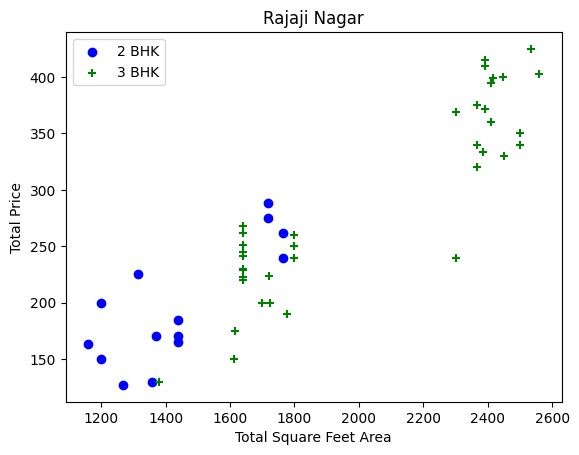

In [71]:
plot_scatter(df5, "Rajaji Nagar")
#for area around 1700 price of 3bhk houses are less then 2 bhk houses. Idealy one should remove these data points, but it seem too complicated to skipped for now.

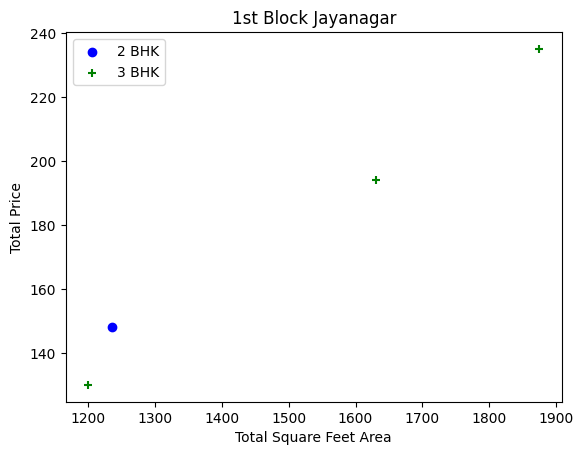

In [72]:
plot_scatter(df5, "1st Block Jayanagar")

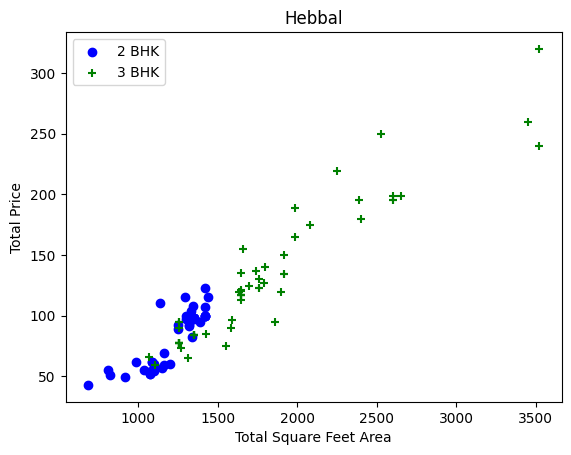

In [73]:
plot_scatter(df5, "Hebbal")

Text(0, 0.5, 'Count')

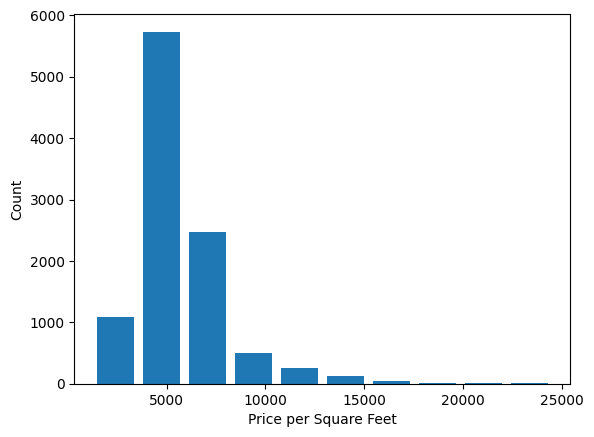

In [74]:
#Histogram
plt.hist(df5["price_per_sqft"], rwidth = 0.8)
plt.xlabel("Price per Square Feet")
plt.ylabel("Count")

Next Outliers

In [75]:
df5.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,1st Block Jayanagar,4 BHK,2850.0,4.0,428.0,4,15017.543860
1,1st Block Jayanagar,3 BHK,1630.0,3.0,194.0,3,11901.840491
2,1st Block Jayanagar,3 BHK,1875.0,2.0,235.0,3,12533.333333
3,1st Block Jayanagar,3 BHK,1200.0,2.0,130.0,3,10833.333333
4,1st Block Jayanagar,2 BHK,1235.0,2.0,148.0,2,11983.805668


In [76]:
df5["bath"].unique()

array([ 4.,  3.,  2.,  5.,  8.,  1.,  6.,  7.,  9., 12., 16., 13.])

In [77]:
df5["bath"] = df5["bath"].astype("int32")

In [78]:
df5["bath"].unique()

array([ 4,  3,  2,  5,  8,  1,  6,  7,  9, 12, 16, 13])

In [79]:
filt6 = (df5["bath"] == 16)
df5[filt6]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
8572,other,16 BHK,10000.0,16,550.0,16,5500.0


In [80]:
#If number of bedrooms < no. of bath rooms by 2 (ie no of bathrooms - no of bedrooms = 2 or more) then it should be classified as a outlier. We should 
#remove these.

Text(0, 0.5, 'Count')

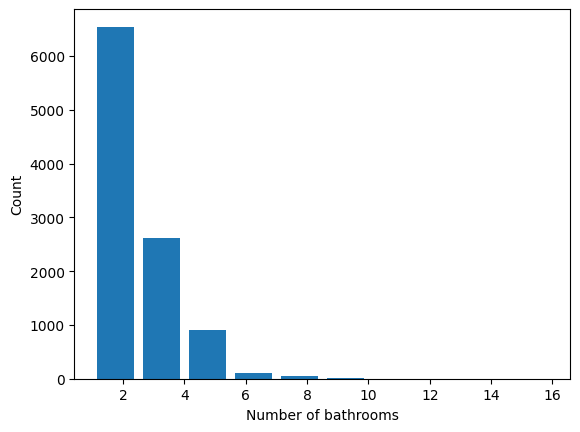

In [81]:
plt.hist(df5["bath"], rwidth = 0.8)
plt.xlabel("Number of bathrooms")
plt.ylabel("Count")

In [82]:
filt7 = (df5["bath"] > df5["bhk"]+2)
df5[filt7]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
1626,Chikkabanavar,4 Bedroom,2460.0,7,80.0,4,3252.032520
5238,Nagasandra,4 Bedroom,7000.0,8,450.0,4,6428.571429
6711,Thanisandra,3 BHK,1806.0,6,116.0,3,6423.034330
8408,other,6 BHK,11338.0,9,1000.0,6,8819.897689


In [83]:
i = df5[filt7].index
df6 = df5.drop(i, axis = "index")

In [84]:
df6

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,1st Block Jayanagar,4 BHK,2850.0,4,428.00,4,15017.543860
1,1st Block Jayanagar,3 BHK,1630.0,3,194.00,3,11901.840491
2,1st Block Jayanagar,3 BHK,1875.0,2,235.00,3,12533.333333
3,1st Block Jayanagar,3 BHK,1200.0,2,130.00,3,10833.333333
4,1st Block Jayanagar,2 BHK,1235.0,2,148.00,2,11983.805668
...,...,...,...,...,...,...,...
10237,other,2 BHK,1353.0,2,110.00,2,8130.081301
10238,other,1 Bedroom,812.0,1,26.00,1,3201.970443
10239,other,3 BHK,1440.0,2,63.93,3,4439.583333
10240,other,2 BHK,1075.0,2,48.00,2,4465.116279


In [85]:
#dropping size and price_per_sqft features as they are unnecessary

In [86]:
df7 = df6.drop(columns = ["size", "price_per_sqft"], axis = "columns")

In [87]:
df7

,location,total_sqft,bath,price,bhk
0,1st Block Jayanagar,2850.0,4,428.00,4
1,1st Block Jayanagar,1630.0,3,194.00,3
2,1st Block Jayanagar,1875.0,2,235.00,3
3,1st Block Jayanagar,1200.0,2,130.00,3
4,1st Block Jayanagar,1235.0,2,148.00,2
...,...,...,...,...,...
10237,other,1353.0,2,110.00,2
10238,other,812.0,1,26.00,1
10239,other,1440.0,2,63.93,3
10240,other,1075.0,2,48.00,2


Machine Learning Model

In [88]:
#One hot encoding on location column
df8 = pd.get_dummies(df7["location"])

In [89]:
pd.set_option('future.no_silent_downcasting', True)
df9 = df8.replace({True : 1, False : 0}) 

In [90]:
#Dropped "other" column from df9

In [91]:
df10 = pd.concat([df9, df7], axis = "columns")

In [92]:
df10

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other,location,total_sqft,bath,price,bhk
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1st Block Jayanagar,2850.0,4,428.00,4
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1st Block Jayanagar,1630.0,3,194.00,3
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1st Block Jayanagar,1875.0,2,235.00,3
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1st Block Jayanagar,1200.0,2,130.00,3
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1st Block Jayanagar,1235.0,2,148.00,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10237,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,other,1353.0,2,110.00,2
10238,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,other,812.0,1,26.00,1
10239,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,other,1440.0,2,63.93,3
10240,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,other,1075.0,2,48.00,2


In [93]:
#dropping location column:
df10 = df10.drop(["location"], axis = "columns")

In [94]:
df10

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other,total_sqft,bath,price,bhk
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,2850.0,4,428.00,4
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1630.0,3,194.00,3
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1875.0,2,235.00,3
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1200.0,2,130.00,3
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1235.0,2,148.00,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10237,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1353.0,2,110.00,2
10238,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,812.0,1,26.00,1
10239,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1440.0,2,63.93,3
10240,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1075.0,2,48.00,2


In [95]:
X = df10.drop("price", axis = "columns")

In [96]:
X.head(2)

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other,total_sqft,bath,bhk
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2850.0,4,4
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1630.0,3,3


In [97]:
y = df10["price"]

In [98]:
y.head(2)

0    428.0
1    194.0
Name: price, dtype: float64

In [99]:
from sklearn.model_selection import train_test_split

In [100]:
# Setting random_state ensures you get the same split every time you run your code
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 10)

In [101]:
from sklearn.linear_model import LinearRegression

In [102]:
model = LinearRegression()

In [103]:
model.fit(X_train, y_train)

LinearRegression()

In [104]:
model.score(X_test, y_test)

0.8497310360285365

In [105]:
#K-fold cross validation
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

In [106]:
cv = ShuffleSplit(n_splits = 5, test_size = 0.2, random_state = 0)

In [107]:
cross_val_score(LinearRegression(), X, y, cv=cv)

array([0.84234472, 0.77093961, 0.71592041, 0.81448478, 0.79954751])

In [108]:
calc = X.loc[3:3,:]
calc = pd.DataFrame(calc)
calc

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other,total_sqft,bath,bhk
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1200.0,2,3


In [109]:
y[3]

130.0

In [110]:
X.columns

Index(['1st Block Jayanagar', '1st Phase JP Nagar',
       '2nd Phase Judicial Layout', '2nd Stage Nagarbhavi',
       '5th Block Hbr Layout', '5th Phase JP Nagar', '6th Phase JP Nagar',
       '7th Phase JP Nagar', '8th Phase JP Nagar', '9th Phase JP Nagar',
       ...
       'Whitefield', 'Yelachenahalli', 'Yelahanka', 'Yelahanka New Town',
       'Yelenahalli', 'Yeshwanthpur', 'other', 'total_sqft', 'bath', 'bhk'],
      dtype='object', length=244)

In [111]:
X.columns[-1]

'bhk'

In [112]:
len(X.columns)

244

In [113]:
def predict_price(X, location, sqft, bath, bhk):
    filt = (X.columns == location)
    loc_index = np.where(filt)[0][0]
    input_vals = np.zeros(shape = len(X.columns))
    input_vals[loc_index] = 1
    input_vals[-1] = int(bhk)
    input_vals[-2] = int(bath)
    input_vals[-3] = sqft
    return input_vals

In [114]:
find = predict_price(X, "2nd Phase Judicial Layout", 1450.0, 2, 3)
find = pd.DataFrame(find)
find = find.transpose()
find

,0,1,2,3,4,5,6,7,8,9,...,234,235,236,237,238,239,240,241,242,243
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1450.0,2.0,3.0


In [115]:
model.predict(find)

C:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([57.32676387])

In [116]:
X.loc[[27],:]

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other,total_sqft,bath,bhk
27,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1450.0,2,3


In [117]:
y.loc[27]

50.75

In [118]:
filt = (X.loc[:,"2nd Phase Judicial Layout"] == 1)
t= X[filt].index[0]
r = X.loc[[t],:]
r.loc[:, "total_sqft"] = 1450.0 #1450.0
r

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other,total_sqft,bath,bhk
27,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1450.0,2,3


Following is function written by me to predict price. Note that it is using the whole input data X

In [119]:
def predict_price1(location, sqft, bath, bhk):
    filt = (X.loc[:, location] == 1)
    temp_index = X[filt].index[0]
    row = X.loc[[temp_index],:]
    row.loc[:, "total_sqft"] = sqft
    row.loc[:, "bath"] = bath
    row.loc[:, "bhk"] = bhk

    price = model.predict(row)[0]
    return price

In [120]:
test01 = predict_price1("2nd Phase Judicial Layout", 1450.0, 2, 3)
test01

57.32676386833191

In [121]:
X.head()

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other,total_sqft,bath,bhk
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2850.0,4,4
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1630.0,3,3
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1875.0,2,3
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1200.0,2,3
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1235.0,2,2


In [122]:
y.head()

0    428.0
1    194.0
2    235.0
3    130.0
4    148.0
Name: price, dtype: float64

In [123]:
predict_price1("1st Phase JP Nagar", 1000, 2, 2)

85.76332306861877

In [124]:
predict_price1("1st Phase JP Nagar", 1000, 3, 3)

85.38022994995117

In [125]:
predict_price1("1st Phase JP Nagar", 1000, 2, 3)

78.76292896270752

In [126]:
predict_price1("Indira Nagar", 1000, 2, 2)

190.50414156913757

In [127]:
predict_price1("Indira Nagar", 1000, 3, 3)

190.12104845046997

In [128]:
#import pickle

In [129]:
#with open("model_pickle", "wb") as f:
#    pickle.dump(model, f)

In [130]:
#import joblib

In [131]:
#joblib.dump(model, "joblib_model")

In [132]:
#joblib.dump(X, "input")

Following is function written by Code Basic guy to predict price. Note that it is NOT using the whole input data X, rather only using X.columns

In [133]:
X.columns

Index(['1st Block Jayanagar', '1st Phase JP Nagar',
       '2nd Phase Judicial Layout', '2nd Stage Nagarbhavi',
       '5th Block Hbr Layout', '5th Phase JP Nagar', '6th Phase JP Nagar',
       '7th Phase JP Nagar', '8th Phase JP Nagar', '9th Phase JP Nagar',
       ...
       'Whitefield', 'Yelachenahalli', 'Yelahanka', 'Yelahanka New Town',
       'Yelenahalli', 'Yeshwanthpur', 'other', 'total_sqft', 'bath', 'bhk'],
      dtype='object', length=244)

In [134]:
np.zeros(len(X.columns))

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [135]:
location = "other"
filt = (X.columns == location)
np.where(filt)[0][0]

240

Final function below to predict price.

In [136]:
def price_predict(location, sqft, bath, bhk):
    filt = (X.columns == location)
    loc_index = np.where(filt)[0][0]
    x = np.zeros(len(X.columns))
    x[loc_index] = 1
    x[-1] = bhk
    x[-2] = bath
    x[-3] = sqft
    calc_df = pd.DataFrame(x)
    calc_df = calc_df.transpose()

    #Warning was coming that above calc_df column names [0,243], so following is the code to change the column names.
    columns = calc_df.columns
    for i in range(len(columns)):
        calc_df.rename(columns = {columns[i] : X.columns[i]}, inplace = True)
    price = model.predict(calc_df)[0]
    return price

In [137]:
price_predict("Indira Nagar", 1000, 3, 3)

190.12104845046997

In [138]:
price_predict("1st Phase JP Nagar", 1000, 2, 2)

85.76332306861877

Exporting model using pickle (can use joblib also, which seems more easy)

In [139]:
#import pickle 

In [140]:
'''
with open("House_price_predict_model.pickle", "wb") as f:
    pickle.dump(model,f)
    '''

'\nwith open("House_price_predict_model.pickle", "wb") as f:\n    pickle.dump(model,f)\n    '

Exporting X.columns as it is also required.

In [141]:
'''
import json
'''

'\nimport json\n'

In [142]:
'''
columns = {
    "data_columns" : [col.lower() for col in X.columns]
} 
with open("columns.json", 'w') as f:
    f.write(json.dumps(columns))
    '''

'\ncolumns = {\n    "data_columns" : [col.lower() for col in X.columns]\n} \nwith open("columns.json", \'w\') as f:\n    f.write(json.dumps(columns))\n    '